# STAT207 Mini-Project #1 - INSERT TITLE HERE


YOUR NAME

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [2]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

## 1. Introduction

How does the nature of the relationship between product name and price change for different values of brand
<!-- Can add rating too -->

My motivation to analyze the dataset and find the answer to this question is to gauge how much brand name plays factor in terms of price, rating, and purchase power. In today's world where most of fashion industry and society is starting to move towards away from brand loyalty.

One type of audience that might find the answer to this question helpful are people who are sticking to brand loyalty. This audience can use the findings from this dataset to analyze how much more money they are spending by sticking to brand loyalty and how much they could save if they strayed away from it.

## 2. Dataset Discussion

I got the fashion_products.csv dataset from kaggle. Here is the link to the dataset: https://www.kaggle.com/datasets/bhanupratapbiswas/fashion-products. I downloaded this file at 11:51 PM on Thursday September 21, 2023. Each row/observation in the dataset is a clothing product. The source doesn't state how the information from the dataset was found. This data is pretty inclusive as it has varieties of clothing and shoes, gender, and ages. The dataset leaves out whether the kids is either boys or girls. The dataset could also include toddler vs kid vs baby just to make the dataset more transparent. Because most of the people viewing this dataset and analysis are older, if they are parents it would be helpful for them to know which brands to buy from in order to budget properly. The three variables I will explore are Product Name, Brand, and Price. Product Name categorizes what type of category the article of clothing is whether it be shoes or dresses or jeans or other. The brand name categorizes the manufacture of that article of clothing. The price categorizes the cost of that product and also brings a valuation for that product item.

In [17]:
product_df = pd.read_csv("fashion_products.csv")
product_df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [18]:
print(f'Rows:',product_df.shape[0])

Rows: 1000


In [19]:
product_df.dtypes

User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object

## 3. Dataset Cleaning

In [21]:
product_df_copy = product_df.copy()
product_df_copy

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [24]:
product_df_copy = product_df_copy[['Product Name','Brand','Price']]
product_df_copy

,Product Name,Brand,Price
0,Dress,Adidas,40
1,Shoes,H&M,82
2,Dress,Adidas,44
3,Shoes,Zara,23
4,T-shirt,Adidas,79
...,...,...,...
995,Shoes,Zara,55
996,Sweater,Nike,13
997,Sweater,Zara,47
998,T-shirt,Zara,68


Missing Value Cleaning

In [27]:
product_df_copy['Product Name'].unique()

array(['Dress', 'Shoes', 'T-shirt', 'Jeans', 'Sweater'], dtype=object)

In [28]:
product_df_copy['Brand'].unique()

array(['Adidas', 'H&M', 'Zara', 'Gucci', 'Nike'], dtype=object)

In [29]:
product_df_copy['Price'].unique()

array([ 40,  82,  44,  23,  79,  47,  37,  64,  53,  55,  51,  91,  35,
        34,  54,  27,  75,  73,  56,  89,  15,  38,  21,  72,  32,  85,
        99,  78,  80,  74,  48,  76,  90,  26,  43,  39,  62,  10,  52,
        67,  59,  16,  33,  61,  93,  24,  25,  66,  41,  36,  68,  86,
        11,  31,  49,  42,  50, 100,  70,  58,  30,  84,  95,  19,  13,
        60,  71,  12,  96,  65,  81,  28,  14,  45,  57,  77,  88,  69,
        98,  20,  87,  92,  17,  97,  94,  22,  29,  18,  63,  83,  46])

The Dataset has no implicit or explicit missing values. Due to it having no implicit or explicit missing values, I didn't have to drop any rows. 

The pros of using the missing values cleaning technique is to remove any externalities in the data that could skew the data (0's that are placed since value isn't there) and rows that don't have some values in some fields. The cons could be removing data that are meant to be, (0s that are meant to be there) believing they are implicit missing values which then removes crucial datapoints.

In [30]:
product_df_copy['Product Name'].value_counts()

Jeans      231
Shoes      222
T-shirt    201
Dress      176
Sweater    170
Name: Product Name, dtype: int64

In [31]:
product_df_copy['Brand'].value_counts()

Nike      214
Zara      203
Adidas    198
H&M       194
Gucci     191
Name: Brand, dtype: int64

In [32]:
product_df_copy['Price'].value_counts()

96     18
80     18
68     18
55     18
85     16
       ..
65      7
54      6
100     6
87      5
46      4
Name: Price, Length: 91, dtype: int64

In [45]:
product_df_copy.groupby(['Product Name','Brand']).size().reset_index(name='counts')

,Product Name,Brand,counts
0,Dress,Adidas,37
1,Dress,Gucci,25
2,Dress,H&M,39
3,Dress,Nike,40
4,Dress,Zara,35
5,Jeans,Adidas,40
6,Jeans,Gucci,52
7,Jeans,H&M,43
8,Jeans,Nike,54
9,Jeans,Zara,42


<AxesSubplot: xlabel='Price'>

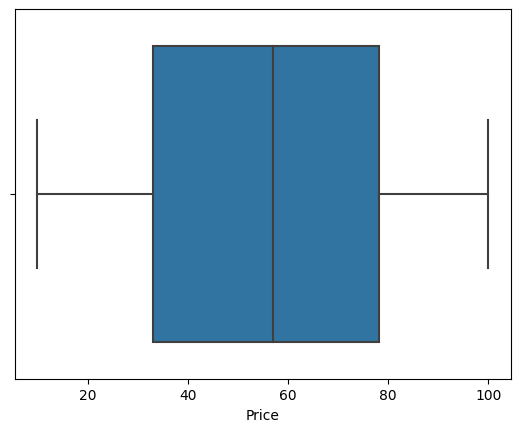

In [48]:
sns.boxplot(x=product_df["Price"])

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

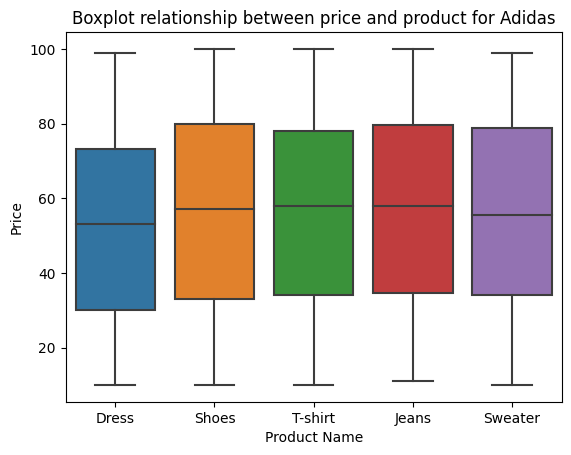

Summary statistics for Adidas:
              count       mean        std   min   25%   50%    75%    max
Product Name                                                             
Dress          37.0  48.837838  28.686537  10.0  23.0  44.0  71.00   99.0
Jeans          40.0  49.275000  25.438702  11.0  27.5  52.0  69.00  100.0
Shoes          46.0  60.260870  23.512110  11.0  45.5  60.5  78.75   97.0
Sweater        32.0  52.625000  26.039362  10.0  33.5  51.5  75.25   96.0
T-shirt        43.0  54.930233  24.378362  13.0  36.0  53.0  71.50   99.0



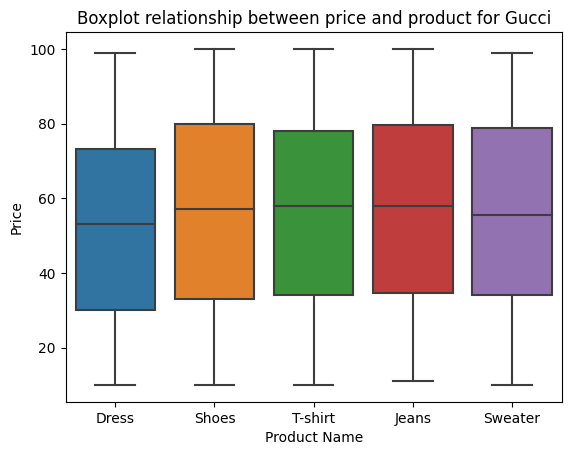

Summary statistics for Gucci:
              count       mean        std   min    25%   50%    75%    max
Product Name                                                              
Dress          25.0  50.280000  27.125511  14.0  25.00  48.0  74.00   99.0
Jeans          52.0  59.980769  26.734343  12.0  37.00  66.5  85.25   98.0
Shoes          45.0  58.111111  28.097414  10.0  35.00  58.0  85.00  100.0
Sweater        32.0  51.531250  26.965910  10.0  29.75  52.5  72.25   98.0
T-shirt        37.0  52.621622  31.547452  10.0  23.00  48.0  83.00  100.0



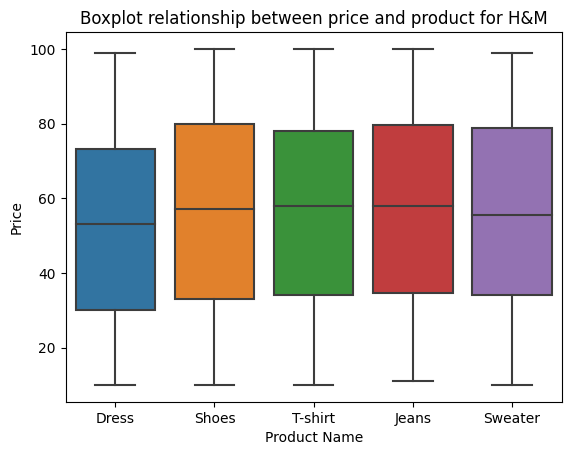

Summary statistics for H&M:
              count       mean        std   min   25%   50%   75%    max
Product Name                                                            
Dress          39.0  57.358974  28.337707  10.0  30.0  64.0  84.5   97.0
Jeans          43.0  62.348837  25.403303  11.0  39.5  68.0  83.0  100.0
Shoes          39.0  55.692308  27.339150  15.0  29.0  66.0  79.0  100.0
Sweater        38.0  61.263158  23.901469  15.0  45.0  62.0  83.5   92.0
T-shirt        35.0  50.000000  22.434218  12.0  37.0  51.0  72.0   86.0



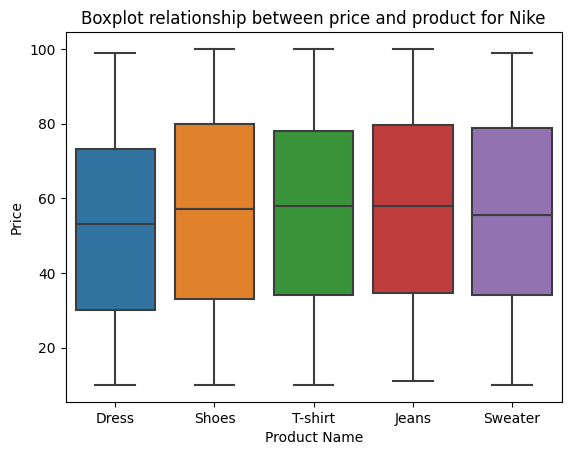

Summary statistics for Nike:
              count       mean        std   min    25%   50%   75%   max
Product Name                                                            
Dress          40.0  55.050000  23.530613  14.0  35.25  55.0  70.5  95.0
Jeans          54.0  57.277778  26.553909  11.0  33.50  56.0  82.0  99.0
Shoes          43.0  55.488372  26.004003  11.0  32.50  54.0  80.5  97.0
Sweater        30.0  57.800000  28.104976  11.0  37.25  60.5  80.0  99.0
T-shirt        47.0  61.808511  26.452285  10.0  45.00  67.0  83.0  99.0



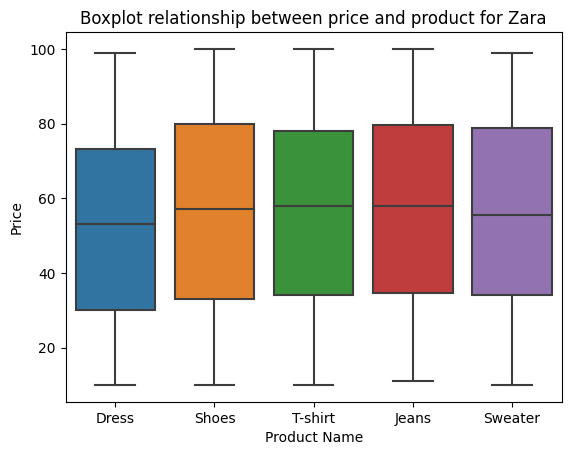

Summary statistics for Zara:
              count       mean        std   min    25%   50%   75%    max
Product Name                                                             
Dress          35.0  53.600000  25.388974  11.0  34.00  59.0  73.0   98.0
Jeans          42.0  53.166667  23.403061  11.0  36.25  51.0  70.0  100.0
Shoes          49.0  54.102041  26.796490  11.0  32.00  50.0  77.0   98.0
Sweater        38.0  50.500000  25.427959  11.0  28.25  48.0  68.5   97.0
T-shirt        39.0  62.435897  28.516657  12.0  37.00  67.0  88.0   99.0



In [63]:
group_by_brand = product_df_copy.groupby('Brand')

for Brand, group in group_by_brand:

    sns.boxplot(x="Product Name",y="Price", data=product_df_copy)
    plt.title(f"Boxplot relationship between price and product for {Brand}")
    plt.show()

    summary_stats = group.groupby("Product Name")["Price"].describe()
    print(f"Summary statistics for {Brand}:\n{summary_stats}\n")

There is little to no variation between product name and price for each of the brands. This means that it doesn't really matter which brand is chosen as the correlation product name and price is pretty much the same between each brand. 

## 5. Conclusion

In analyzing the relationship between product name and price across different types of brand within the fashion products dataset, we observed that there wasn't that much of notable variations based off brand. This shows that most all brands have the same price point for products. It is important to acknowledge limitations and caveats in the data. The limitations are that the clothing types that are used are limited as it is only basic products and the companies that were used didn't really vary. If there was a more diverse set of brands and products we would be able to find more variance between the brands. These shortcomings could impact buyers that have different purposes in mind. An example is if they are looking for certain types of clothing (vintage, professional, etc.). Further data analysis could relate to purchase times regarding seasonal (thanksgiving, black friday, summar, etc.). Further analyzations into outliers can also enhance the accuracy of the conclusions.